In [14]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# the path of result files
target_path = os.path.join('..', '..', '..', '..', 'datasets', 'improved_pt_dataset', 'test_datasets')
# os.path.isdir(target_path)

True

In [7]:
def prescient_output_to_df(file_name):
    '''Helper for loading data from Prescient output csv.
        Combines Datetimes into single column.
    '''
    df = pd.read_csv(file_name)
    df['Datetime'] = \
        pd.to_datetime(df['Date']) + \
        pd.to_timedelta(df['Hour'], 'hour') + \
        pd.to_timedelta(df['Minute'], 'minute')
    df.drop(columns=['Date','Hour','Minute'], inplace=True)
    # put 'Datetime' in front
    cols = df.columns.tolist()
    cols = cols[-1:]+cols[:-1]
    return df[cols]

def get_gdf(directory, generator_file_name, generator_name, dispatch_name):
    gdf = prescient_output_to_df(os.path.join(directory, generator_file_name))
    gdf = gdf[gdf["Generator"] == generator_name][["Datetime", dispatch_name, dispatch_name + " DA"]]
    gdf.set_index("Datetime", inplace=True)
    gdf.rename(columns={ dispatch_name : generator_name + " Dispatch", dispatch_name + " DA" : generator_name + " Dispatch DA"}, inplace=True)

    return gdf

In [58]:
gen_name = "121_NUCLEAR_1"
path_1 = os.path.join(target_path, 'test_ne_sweep_index_test_1')
dispatch_1 = get_gdf(path_1, "thermal_detail.csv", gen_name, "Dispatch")
# dispatch

In [40]:
bus_name = "Attlee"
bdf_1 = prescient_output_to_df(os.path.join(path_1, "bus_detail.csv"))
bdf_1 = bdf_1[bdf_1["Bus"] == bus_name][["Datetime","LMP","LMP DA"]]
bdf_1.set_index("Datetime", inplace=True)
bdf_1

,LMP,LMP DA
Datetime,,
2020-01-01 00:00:00,0.000000,-0.000000
2020-01-01 01:00:00,0.000000,-0.000000
2020-01-01 02:00:00,0.000000,-0.000000
2020-01-01 03:00:00,0.000000,-0.000000
2020-01-01 04:00:00,0.000000,-0.000000
...,...,...
2020-12-31 19:00:00,25.908700,26.501933
2020-12-31 20:00:00,25.908700,26.501933
2020-12-31 21:00:00,75.908700,23.437807


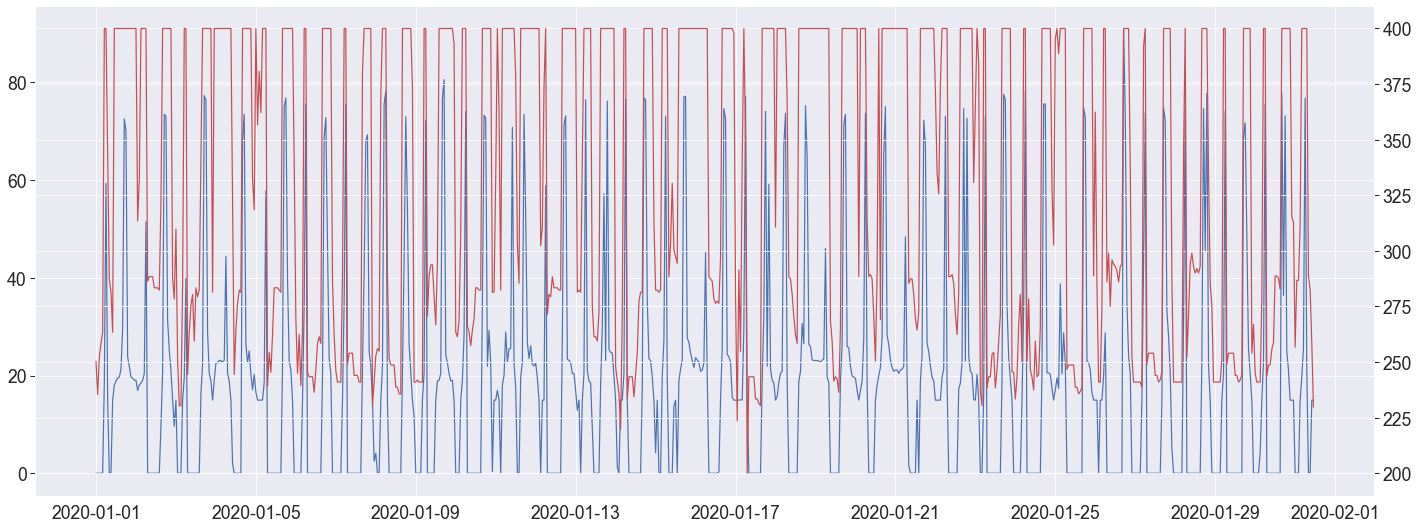

In [31]:
fig, ax1 = plt.subplots(figsize=(24,9))
ax1.plot(bdf_1['LMP DA'][0:732])
ax2 = ax1.twinx()
ax2.plot(dispatch["121_NUCLEAR_1 Dispatch DA"][0:732], color='r')
# plt.plot(dispatch['121_NUCLEAR_1 Dispatch DA'])

In [59]:
path_2 = os.path.join(target_path, 'test_ne_sweep_index_test_2')
bus_name = "Attlee"
bdf_2 = prescient_output_to_df(os.path.join(path_2, "bus_detail.csv"))
bdf_2 = bdf_2[bdf_2["Bus"] == bus_name][["Datetime","LMP","LMP DA"]]
bdf_2.set_index("Datetime", inplace=True)
dispatch_2 = get_gdf(path_2, "thermal_detail.csv", gen_name, "Dispatch")

In [68]:
print(bdf_1['LMP DA'].mean(), bdf_2['LMP DA'].mean())
print(bdf_1['LMP DA'].median(), bdf_2['LMP DA'].median())
bdf_1.head(24)

22.896654774931697 23.602947020264118
21.288154 21.287879


,LMP,LMP DA
Datetime,,
2020-01-01 00:00:00,0.000000,-0.000000
2020-01-01 01:00:00,0.000000,-0.000000
2020-01-01 02:00:00,0.000000,-0.000000
2020-01-01 03:00:00,0.000000,-0.000000
2020-01-01 04:00:00,0.000000,-0.000000
2020-01-01 05:00:00,0.000000,18.573789
2020-01-01 06:00:00,14.956032,59.330421
2020-01-01 07:00:00,18.521870,14.960602
2020-01-01 08:00:00,0.000000,-0.000000


In [ ]:
bdf_1['LMP DA'][0:30]

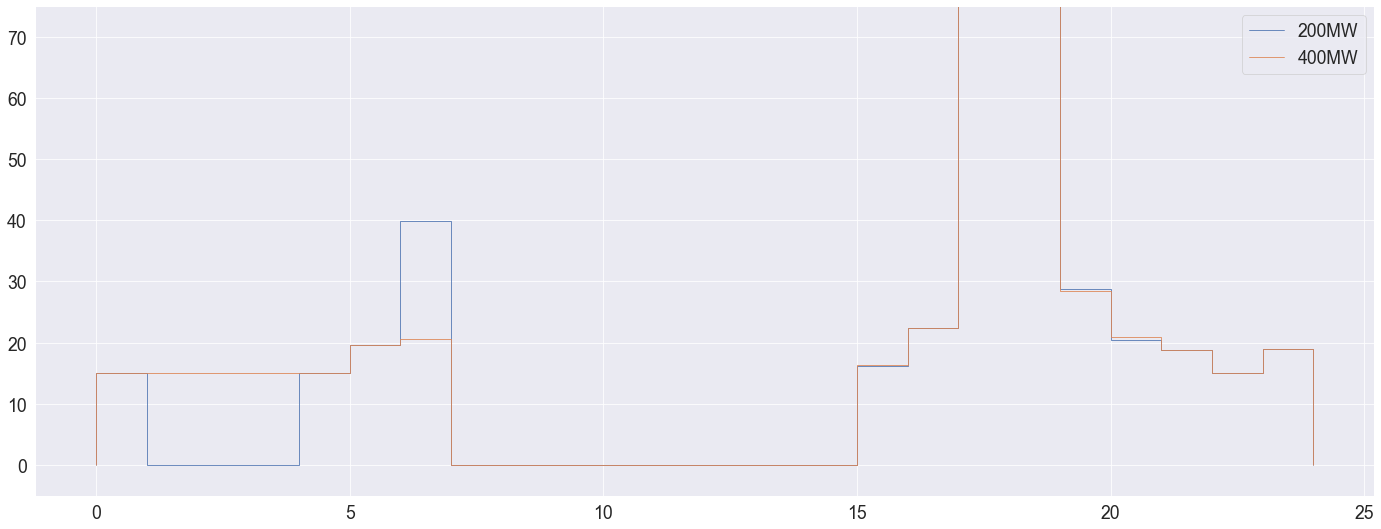

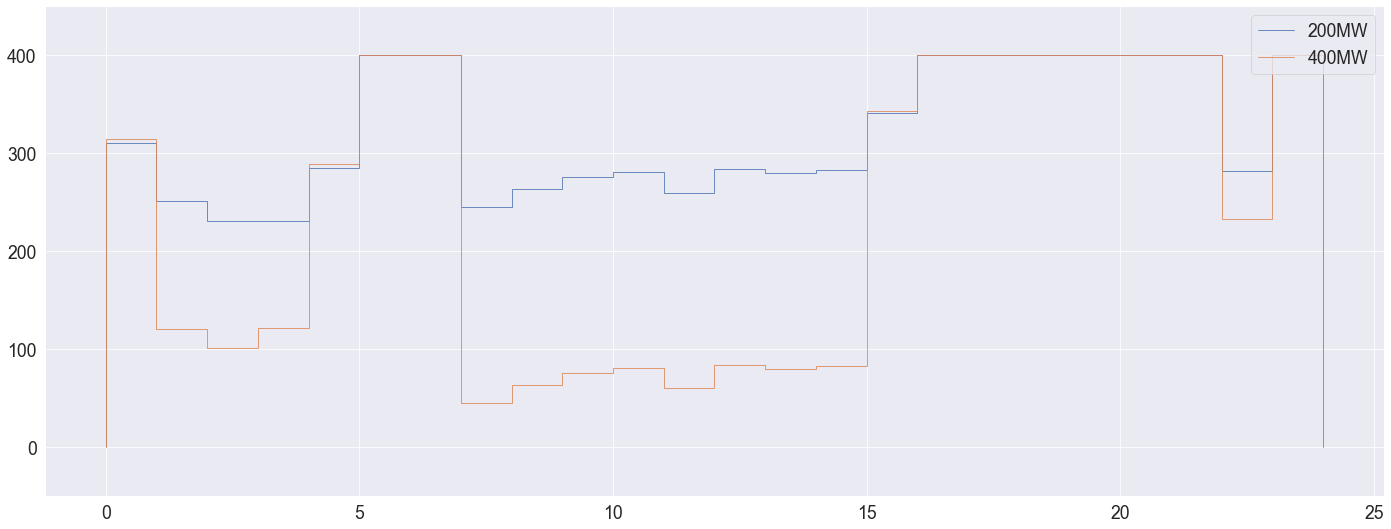

In [66]:
fig1, ax1 = plt.subplots(figsize=(24,9))
ax1.stairs(bdf_1['LMP DA'][48:72], label = '200MW')
ax1.stairs(bdf_2['LMP DA'][48:72], label = '400MW')
ax1.set_ylim(-5,75)
plt.legend()

fig2, ax2 = plt.subplots(figsize=(24,9))
ax2.stairs(dispatch_1["121_NUCLEAR_1 Dispatch DA"][48:72], label = '200MW')
ax2.stairs(dispatch_2["121_NUCLEAR_1 Dispatch DA"][48:72], label = '400MW')
ax2.set_ylim(-50,450)
plt.legend()

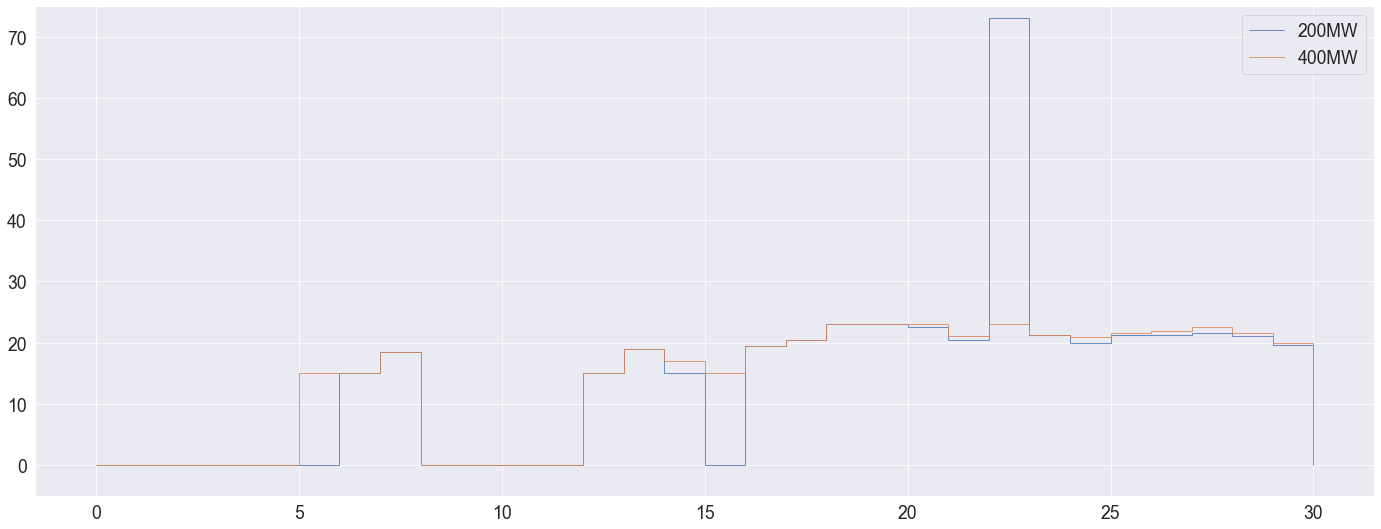

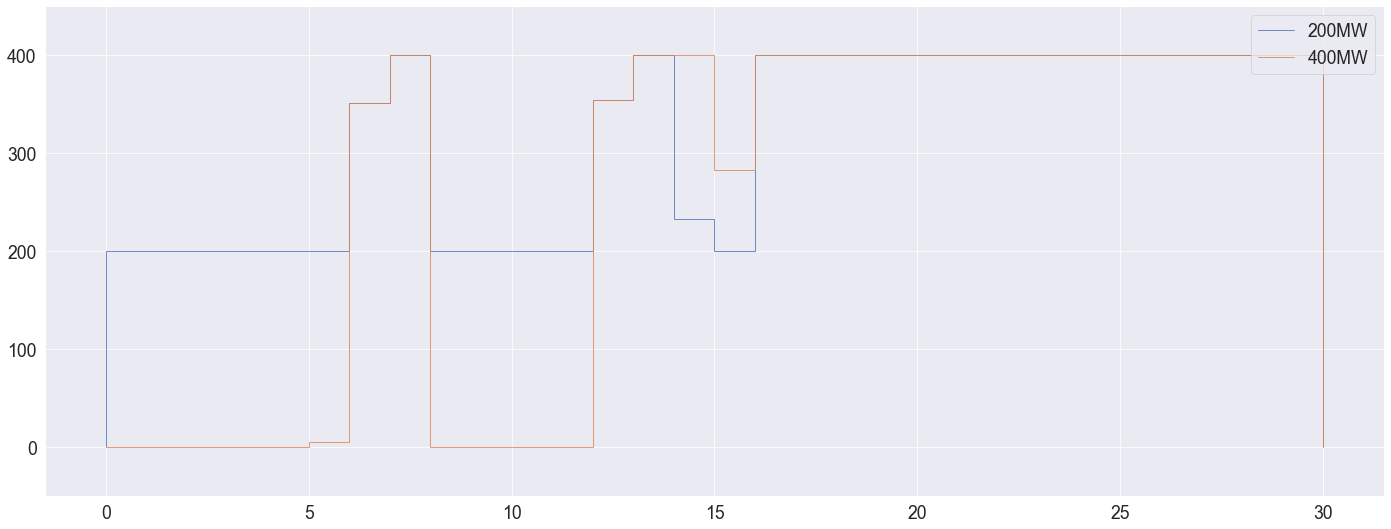

In [65]:
fig1, ax1 = plt.subplots(figsize=(24,9))
ax1.stairs(bdf_1['LMP'][0:30], label = '200MW')
ax1.stairs(bdf_2['LMP'][0:30], label = '400MW')
ax1.set_ylim(-5,75)
plt.legend()

fig2, ax2 = plt.subplots(figsize=(24,9))
ax2.stairs(dispatch_1["121_NUCLEAR_1 Dispatch"][0:30], label = '200MW')
ax2.stairs(dispatch_2["121_NUCLEAR_1 Dispatch"][0:30], label = '400MW')
ax2.set_ylim(-50,450)
plt.legend()

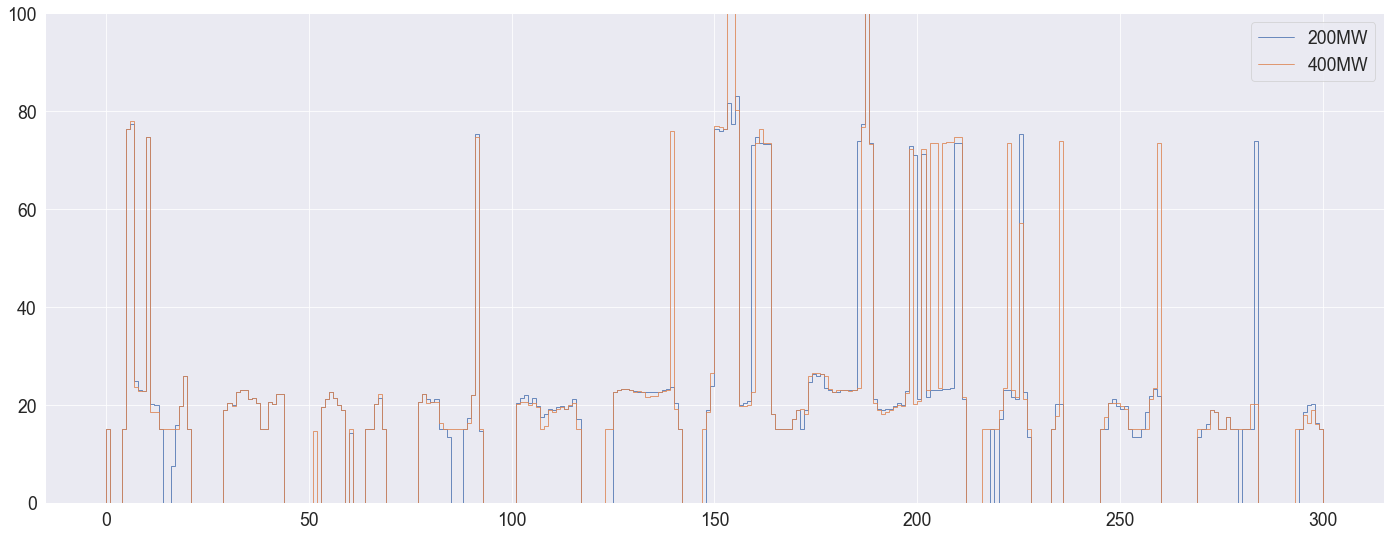

In [57]:
fig, ax1 = plt.subplots(figsize=(24,9))
ax1.stairs(bdf_1['LMP'][300:600], label = '200MW')
ax1.stairs(bdf_2['LMP'][300:600], label = '400MW')
ax1.set_ylim(0,100)
plt.legend()